In [10]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Filtered_Monthly_Ridership.csv'
data = pd.read_csv(file_path)

# Display basic info about the dataset
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2313 entries, 0 to 2312
Data columns (total 65 columns):
NTD ID      2301 non-null float64
Agency      2301 non-null object
Mode        2311 non-null object
TOS         2301 non-null object
UZA Name    2295 non-null object
1/2019      1308 non-null object
2/2019      1306 non-null object
3/2019      1307 non-null object
4/2019      1306 non-null object
5/2019      1306 non-null object
6/2019      1308 non-null object
7/2019      1300 non-null object
8/2019      1301 non-null object
9/2019      1306 non-null object
10/2019     1307 non-null object
11/2019     1307 non-null object
12/2019     1307 non-null object
1/2020      1317 non-null object
2/2020      1316 non-null object
3/2020      1320 non-null object
4/2020      1321 non-null object
5/2020      1322 non-null object
6/2020      1322 non-null object
7/2020      1314 non-null object
8/2020      1317 non-null object
9/2020      1319 non-null object
10/2020     1317 non-null object
1

,NTD ID,Agency,Mode,TOS,UZA Name,1/2019,2/2019,3/2019,4/2019,5/2019,...,3/2023,4/2023,5/2023,6/2023,7/2023,8/2023,9/2023,10/2023,11/2023,12/2023
0,1.0,King County,DR,PT,"Seattle--Tacoma, WA","75,357","52,494","74,996","77,393","79,347",...,"72,764","74,025","82,275","77,174","78,108","84,351","79,299","87,293","82,661","78,703"
1,1.0,King County,DR,TX,"Seattle--Tacoma, WA","14,513","9,490","15,058","16,394","15,939",...,"11,402","10,438","10,611","9,856","9,619","10,723","9,840","10,849","9,790","8,395"
2,1.0,King County,FB,DO,"Seattle--Tacoma, WA","59,293","41,375","56,148","58,572","69,194",...,"26,039","25,581","39,368","41,956","63,863","52,949","40,791","30,675","20,559","21,028"
3,1.0,King County,LR,DO,"Seattle--Tacoma, WA",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,King County,MB,DO,"Seattle--Tacoma, WA","8,688,609","7,614,112","8,662,761","8,904,840","9,280,947",...,"5,351,825","5,226,959","5,517,552","5,360,599","5,297,609","5,504,095","5,252,779","6,019,489","5,431,339","4,994,122"


In [11]:
# Clean the ridership data by removing commas and converting to numeric format
def clean_ridership_data(df, columns):
    for col in columns:
        df[col] = df[col].str.replace(',', '').astype(float)
    return df

# Identify monthly columns
monthly_columns = [col for col in data.columns if '/' in col]

# Clean the data
data_cleaned = clean_ridership_data(data, monthly_columns)

# Check the cleaned data
data_cleaned[monthly_columns].head()

,1/2019,2/2019,3/2019,4/2019,5/2019,6/2019,7/2019,8/2019,9/2019,10/2019,...,3/2023,4/2023,5/2023,6/2023,7/2023,8/2023,9/2023,10/2023,11/2023,12/2023
0,75357.0,52494.0,74996.0,77393.0,79347.0,73323.0,78161.0,78350.0,73259.0,82385.0,...,72764.0,74025.0,82275.0,77174.0,78108.0,84351.0,79299.0,87293.0,82661.0,78703.0
1,14513.0,9490.0,15058.0,16394.0,15939.0,14274.0,13790.0,12821.0,15375.0,19564.0,...,11402.0,10438.0,10611.0,9856.0,9619.0,10723.0,9840.0,10849.0,9790.0,8395.0
2,59293.0,41375.0,56148.0,58572.0,69194.0,74257.0,90079.0,67308.0,62058.0,56795.0,...,26039.0,25581.0,39368.0,41956.0,63863.0,52949.0,40791.0,30675.0,20559.0,21028.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8688609.0,7614112.0,8662761.0,8904840.0,9280947.0,8622153.0,8840564.0,8718288.0,8437124.0,9619655.0,...,5351825.0,5226959.0,5517552.0,5360599.0,5297609.0,5504095.0,5252779.0,6019489.0,5431339.0,4994122.0


In [13]:
# Extract the relevant periods
pre_covid_columns = monthly_columns[:12]  # Jan 2019 - Dec 2019
during_covid_columns = monthly_columns[12:24]  # Jan 2020 - Dec 2020
post_covid_columns = monthly_columns[24:]  # Jan 2022 - Dec 2023

# Sum the ridership across all agencies for each month in each period
pre_covid_agg = data_cleaned[pre_covid_columns].sum(axis=0)
during_covid_agg = data_cleaned[during_covid_columns].sum(axis=0)
post_covid_agg = data_cleaned[post_covid_columns].sum(axis=0)

In [14]:
# Calculate the total ridership for each period
total_pre_covid_ridership = pre_covid_agg.sum()
total_during_covid_ridership = during_covid_agg.sum()
total_post_covid_ridership = post_covid_agg.sum()

# Display the results
total_pre_covid_ridership, total_during_covid_ridership, total_post_covid_ridership

(392649106362.0, 288391622215.0, 663644882330.0)

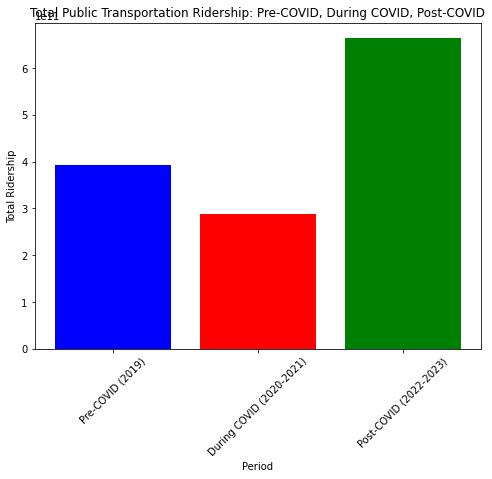

In [15]:
# Create a bar plot to visualize the total ridership for each period
periods = ['Pre-COVID (2019)', 'During COVID (2020-2021)', 'Post-COVID (2022-2023)']
total_ridership = [total_pre_covid_ridership, total_during_covid_ridership, total_post_covid_ridership]

plt.figure(figsize=(8, 6))
plt.bar(periods, total_ridership, color=['blue', 'red', 'green'])
plt.title("Total Public Transportation Ridership: Pre-COVID, During COVID, Post-COVID")
plt.xlabel("Period")
plt.ylabel("Total Ridership")
plt.xticks(rotation=45)
plt.show()

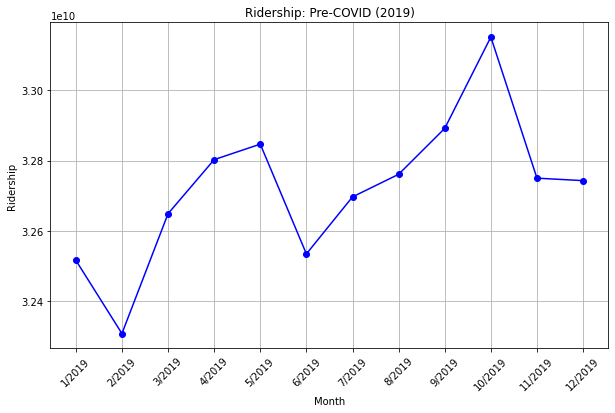

In [17]:
# Create a line plot for Pre-COVID: Jan 2019 - Dec 2019
plt.figure(figsize=(10, 6))
plt.plot(pre_covid_columns, pre_covid_agg, label='Pre-COVID (2019)', color='blue', marker='o')
plt.title("Ridership: Pre-COVID (2019)")
plt.xlabel("Month")
plt.ylabel("Ridership")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

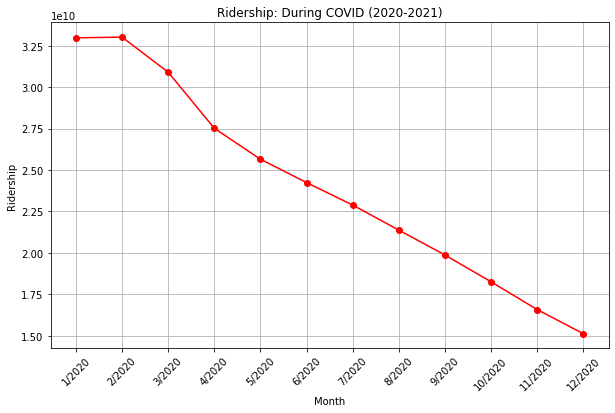

In [18]:
# Create a line plot for During COVID: Jan 2020 - Dec 2021
plt.figure(figsize=(10, 6))
plt.plot(during_covid_columns, during_covid_agg, label='During COVID (2020-2021)', color='red', marker='o')
plt.title("Ridership: During COVID (2020-2021)")
plt.xlabel("Month")
plt.ylabel("Ridership")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

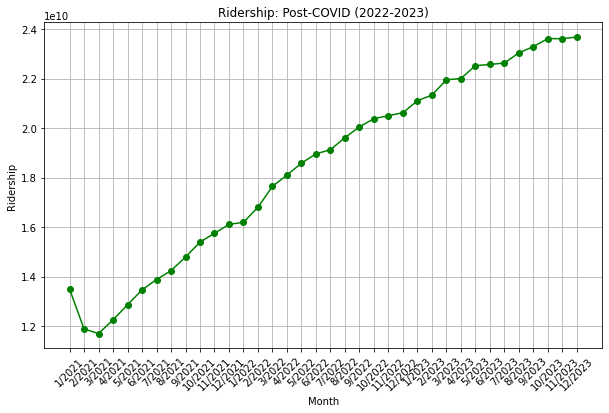

In [19]:
# Create a line plot for Post-COVID: Jan 2022 - Dec 2023
plt.figure(figsize=(10, 6))
plt.plot(post_covid_columns, post_covid_agg, label='Post-COVID (2022-2023)', color='green', marker='o')
plt.title("Ridership: Post-COVID (2022-2023)")
plt.xlabel("Month")
plt.ylabel("Ridership")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()